### Data Exploration

In [1]:
# Import important liabraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv('twitter_disaster.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

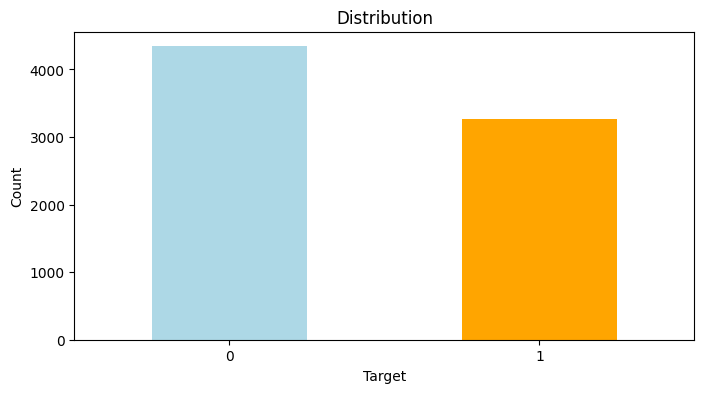

In [6]:
# Plot target distribution
plt.figure(figsize=(8, 4))
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Analyze the frequency of keywords and phrases associated with disaster tweets.
disaster_text = df[df['target'] == 1]['text']
non_disaster_text = df[df['target'] == 0]['text']

In [8]:
disaster_text.value_counts()

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...         4
.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4           3
                                                                                                                                                ..
Philippines Must Protect Internally Displaced Persons Warns UN Expert - The Diplomat http://t.co/V0yRfH9DKc      

In [9]:
disaster_text.shape

(3271,)

In [10]:
non_disaster_text.value_counts()

text
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'             4
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam    4
@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.                            3
Beware of your temper and a loose tongue! These two dangerous weapons combined can lead a person to the Hellfire #islam!       3
@spinningbot Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.                          3
                                                                                                                              ..
Demolished My Personal Best  http://t.co/ImULLBvUEd                                                                            1
5000 year old ring fort to be demolished http://t.co/1PxpoqKTjo                             

In [11]:
non_disaster_text.shape

(4342,)

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [13]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokenization
disaster_tokens = [word.lower() for text in disaster_text for word in word_tokenize(text)]
non_disaster_tokens = [word.lower() for text in non_disaster_text for word in word_tokenize(text)]

In [15]:
# Remove stopswords and puncuation
stop_words = set(stopwords.words('english'))
disaster_tokens = [word for word in disaster_tokens if word.isalnum() and word not in stop_words]
non_disaster_tokens = [word for word in non_disaster_tokens if word.isalnum() and word not in stop_words]

In [16]:
# Count keywords frequencies
keyword_counts_disaster = Counter(disaster_tokens)
keyword_counts_non_disaster = Counter(non_disaster_tokens)

In [17]:
# Display the most common keywords
print('Top 20 Keywords in Disaster Tweets')
for keyword, count in keyword_counts_disaster.most_common(20):
    print(f'{keyword}: {count}')

Top 20 Keywords in Disaster Tweets
http: 2380
fire: 177
news: 140
amp: 135
https: 133
via: 121
disaster: 119
california: 111
police: 107
people: 104
suicide: 104
killed: 93
like: 93
storm: 87
hiroshima: 87
crash: 85
fires: 84
families: 81
train: 79
2: 76


In [18]:
print('Top 20 Keywords in Non-Disaster Tweets')
for keyword, count in keyword_counts_non_disaster.most_common(20):
    print(f'{keyword}: {count}')

Top 20 Keywords in Non-Disaster Tweets
http: 1927
https: 276
like: 253
amp: 209
new: 168
get: 162
one: 129
body: 111
would: 105
via: 97
video: 96
people: 93
got: 92
love: 89
2: 86
know: 85
back: 84
time: 83
see: 82
emergency: 81


### Data Preparation

In [19]:
import re

In [20]:
# Define the clean_test fuction
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and puntuation marks
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [21]:
# Apply the clean_test function to the df
df['cleaned_text'] = df['text'].apply(clean_text)

In [22]:
# Tokenize the text into individual words
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

In [23]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:
# Lemmatize words
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [28]:
df

,id,keyword,location,text,target,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,"[Two, giant, crane, holding, bridge, collapse,..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...,"[ariaahrary, TheTawniest, control, wild, fire,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M UTCkm S of Volcano Hawaii,"[UTCkm, Volcano, Hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,"[Police, investigating, ebike, collided, car, ..."


In [29]:
# Split the dataset into training and testing
X = df.drop(['target'], axis=1)
y = df['target']

In [30]:
X

,id,keyword,location,text,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...,"[Two, giant, crane, holding, bridge, collapse,..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,ariaahrary TheTawniest The out of control wild...,"[ariaahrary, TheTawniest, control, wild, fire,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M UTCkm S of Volcano Hawaii,"[UTCkm, Volcano, Hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,Police investigating after an ebike collided w...,"[Police, investigating, ebike, collided, car, ..."


In [31]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

### Feature Engineering

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
# Word Frequencies
word_freq_vectorizer = CountVectorizer()
word_freq_matrix = word_freq_vectorizer.fit_transform(X['cleaned_text'])
word_freq_df = pd.DataFrame(word_freq_matrix.toarray(), columns=word_freq_vectorizer.get_feature_names_out())

In [34]:
# Display the extracted features
print('Word Frequencies:')
word_freq_df.head()

Word Frequencies:


,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aampb,aampw,aan,...,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Convert feature matrices to DataFrame
word_freq = pd.DataFrame(word_freq_matrix.toarray(), columns=word_freq_vectorizer.get_feature_names_out())

In [36]:
# TF-IDF Scores
# Concatenate tokens into strings
documents = [' '.join(tokens) for tokens in X['tokens']]

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [37]:
# Display the extracted features
print('\nTF-IDF Scores:')
tfidf_df.head()


TF-IDF Scores:


,aba,abc,ablaze,accident,account,across,act,action,actually,added,...,years,yes,yet,york,young,youre,youth,youtube,yr,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
import pickle

# Serialize the tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
# Sentiment Analysis
sentiment_analyzer = SentimentIntensityAnalyzer()
X['sentiment_score'] = X['cleaned_text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

In [41]:
# Display the extracted features
print('\nSentiment Analysis:')
X[['cleaned_text', 'sentiment_score']].head()


Sentiment Analysis:


,cleaned_text,sentiment_score
0,Our Deeds are the Reason of this earthquake Ma...,0.2732
1,Forest fire near La Ronge Sask Canada,-0.3400
2,All residents asked to shelter in place are be...,-0.2960
3,people receive wildfires evacuation orders in...,0.0000
4,Just got sent this photo from Ruby Alaska as s...,0.0000


In [42]:
# Concatenate the new features with the original dataset
X = pd.concat([X, tfidf_df], axis=1)

In [43]:
## Additional features like tweet length, presence of hashtags, or user mentions
# Tweet Length
X['tweet_length'] = X['cleaned_text'].apply(len)

In [44]:
# Reset the index of the DataFrame
X = X.reset_index(drop=True)
X.head()

,id,keyword,location,text,cleaned_text,tokens,sentiment_score,aba,abc,ablaze,...,yes,yet,york,young,youre,youth,youtube,yr,zone,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...",0.2732,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]",-0.3400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of...",-0.2960,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in...,"[people, receive, wildfire, evacuation, order,...",0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...",0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86


In [45]:
# Using pre-trained word embeddings Word2Vec
from gensim.models import Word2Vec

In [46]:
# Train CBOW model
Word2Vec_model = Word2Vec(sentences=X['tokens'], vector_size=100, window=5, min_count=1)

In [47]:
# Get Word2Vec embeddings
word_embeddings = Word2Vec_model.wv

In [48]:
# Retrieve word embeddings for all tokens
word_vectors = [word_embeddings[token] for token_list in X['tokens'] for token in token_list]

In [49]:
word_vectors

[array([-3.1252927e-03,  5.9187436e-03, -4.8565273e-03, -4.5389641e-04,
         6.9520604e-03, -4.2830419e-04, -1.8602498e-03, -2.0299221e-03,
        -3.6460028e-03, -5.5587683e-03, -5.5748802e-03, -3.0222212e-04,
         2.9444778e-03,  5.8722291e-03,  6.1321519e-03,  4.7603915e-03,
        -8.8592349e-03,  8.4600179e-05,  2.1337941e-03,  2.6921544e-03,
        -8.0102561e-03,  8.3502596e-03, -5.4370589e-03,  6.3659945e-03,
         3.7281760e-03,  9.1410065e-03, -5.8974144e-03,  5.1554809e-03,
         5.3989333e-03, -7.9891719e-03, -4.3503349e-03, -1.4169867e-03,
         7.7824695e-03,  9.7180596e-03,  8.2181273e-03, -4.1580084e-03,
        -1.9530249e-03,  5.2141310e-03,  5.6871627e-03, -9.7486023e-03,
        -6.1792135e-03,  8.9459494e-03, -5.7584159e-03,  8.6667957e-03,
         5.0737024e-03, -2.9285642e-04, -1.1615460e-03, -5.1216735e-03,
        -7.2481297e-03,  7.9620816e-03, -2.8903824e-03, -4.7065238e-03,
        -5.9804233e-04, -4.9235113e-03,  9.2988638e-03,  3.79359

In [50]:
# Train Skip-gram model
Word2Vec_model2 = Word2Vec(sentences=X['tokens'], vector_size=100, window=5, min_count=1, sg=1)

In [51]:
# Get Word2Vec embeddings
word_embeddings2 = Word2Vec_model.wv

In [52]:
# Retrieve word embeddings for all tokens
word_vectors2 = [word_embeddings2[token] for token_list in X['tokens'] for token in token_list]

In [53]:
word_vectors2

[array([-3.1252927e-03,  5.9187436e-03, -4.8565273e-03, -4.5389641e-04,
         6.9520604e-03, -4.2830419e-04, -1.8602498e-03, -2.0299221e-03,
        -3.6460028e-03, -5.5587683e-03, -5.5748802e-03, -3.0222212e-04,
         2.9444778e-03,  5.8722291e-03,  6.1321519e-03,  4.7603915e-03,
        -8.8592349e-03,  8.4600179e-05,  2.1337941e-03,  2.6921544e-03,
        -8.0102561e-03,  8.3502596e-03, -5.4370589e-03,  6.3659945e-03,
         3.7281760e-03,  9.1410065e-03, -5.8974144e-03,  5.1554809e-03,
         5.3989333e-03, -7.9891719e-03, -4.3503349e-03, -1.4169867e-03,
         7.7824695e-03,  9.7180596e-03,  8.2181273e-03, -4.1580084e-03,
        -1.9530249e-03,  5.2141310e-03,  5.6871627e-03, -9.7486023e-03,
        -6.1792135e-03,  8.9459494e-03, -5.7584159e-03,  8.6667957e-03,
         5.0737024e-03, -2.9285642e-04, -1.1615460e-03, -5.1216735e-03,
        -7.2481297e-03,  7.9620816e-03, -2.8903824e-03, -4.7065238e-03,
        -5.9804233e-04, -4.9235113e-03,  9.2988638e-03,  3.79359

### Model selection and Training

In [54]:
# Drop the first 6 columns ['id', 'keyword', 'location', 'text', 'cleaned_text', 'tokens']
X = X.iloc[:, 6:]
X

,sentiment_score,aba,abc,ablaze,accident,account,across,act,action,actually,...,yes,yet,york,young,youre,youth,youtube,yr,zone,tweet_length
0,0.2732,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
1,-0.3400,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
2,-0.2960,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130
3,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58
4,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,-0.4939,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
7609,-0.5849,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120
7610,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29
7611,-0.7845,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132


In [55]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [56]:
# Save the feature names
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

In [57]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

## Standardize the feature matrix
#scaler = StandardScaler()
##X_scaled = scaler.fit_transform(X.drop(['id', 'keyword', 'location', 'text', 'cleaned_text', 'tokens'], axis=1))
#X_scaled = scaler.fit_transform(X)

## Determine the number of components
#n_components = min(50, X_scaled.shape[0], X_scaled.shape[1])

#pca = PCA(n_components=n_components)

## Fit PCA to the standardized feature matrix
#pca.fit(X_scaled)

## Transform the standardized feature matrix into reduced-dimensional space
#X_pca = pca.transform(X_scaled)

#### LogisticRegression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize models
lr = LogisticRegression()
rf = RandomForestClassifier()
mlp = MLPClassifier()

In [61]:
# Train the model
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [62]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)


### Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Accuracy LogisticRegression:", accuracy_lr)
print("Accuracy RandomeForestRegression:", accuracy_rf)
print("Accuracy MLPClassifier:", accuracy_mlp)

Accuracy LogisticRegression: 0.7931713722915299
Accuracy RandomeForestRegression: 0.7839789888378201
Accuracy MLPClassifier: 0.7649376231122784


In [65]:
# Print classification report
print("Classification Report LogisticRegression:")
print(classification_report(y_test, y_pred_lr))

print("Classification Report RandomeForestRegression:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report MLPClassifier:")
print(classification_report(y_test, y_pred_mlp))

Classification Report LogisticRegression:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Classification Report RandomeForestRegression:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.67      0.73       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Classification Report MLPClassifier:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       874
           1       0.73      0.71      0.72       649

    accuracy                           0.76      1523
  

### Model Validation

In [66]:
# Validate the model on the testing dataset
y_pred_test_lr = lr.predict(X_test)

In [67]:
# Evaluate the model's performance on the testing dataset
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Accuracy on Testing Dataset for LogisticRegression:", accuracy_test_lr)

Accuracy on Testing Dataset for LogisticRegression: 0.7931713722915299


In [68]:
# Check for overfitting or underfitting
y_pred_train_lr = lr.predict(X_train)
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
print("Accuracy on Training Dataset for LogisticRegression:", accuracy_train_lr)

Accuracy on Training Dataset for LogisticRegression: 0.8308702791461412


In [69]:
# Compare training and testing accuracies to check for overfitting or underfitting
if accuracy_train_lr > accuracy_test_lr:
    print("Warning: The model may be overfitting.")
elif accuracy_train_lr < accuracy_test_lr:
    print("Warning: The model may be underfitting.")
else:
    print("The model is performing consistently on both training and testing datasets.")

In [70]:
# Validate the model on the testing dataset
y_pred_test_rf = rf.predict(X_test)

In [71]:
# Evaluate the model's performance on the testing dataset
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Accuracy on Testing Dataset for RandomeForestRegression:", accuracy_test_rf)

Accuracy on Testing Dataset for RandomeForestRegression: 0.7839789888378201


In [72]:
# Check for overfitting or underfitting
y_pred_train_rf = rf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print("Accuracy on Training Dataset for LogisticRegression:", accuracy_train_rf)

Accuracy on Training Dataset for LogisticRegression: 0.9880131362889983


In [73]:
# Compare training and testing accuracies to check for overfitting or underfitting
if accuracy_train_rf > accuracy_test_rf:
    print("Warning: The model may be overfitting.")
elif accuracy_train_rf < accuracy_test_rf:
    print("Warning: The model may be underfitting.")
else:
    print("The model is performing consistently on both training and testing datasets.")

In [74]:
# Validate the model on the testing dataset
y_pred_test_mlp = mlp.predict(X_test)

In [75]:
# Evaluate the model's performance on the testing dataset
accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
print("Accuracy on Testing Dataset for MLPClassifier:", accuracy_test_mlp)

Accuracy on Testing Dataset for MLPClassifier: 0.7649376231122784


In [76]:
# Check for overfitting or underfitting
y_pred_train_mlp = mlp.predict(X_train)
accuracy_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
print("Accuracy on Training Dataset for MLPClassifier:", accuracy_train_mlp)

Accuracy on Training Dataset for MLPClassifier: 0.9009852216748768


In [77]:
# Compare training and testing accuracies to check for overfitting or underfitting
if accuracy_train_mlp > accuracy_test_mlp:
    print("Warning: The model may be overfitting.")
elif accuracy_train_mlp < accuracy_test_mlp:
    print("Warning: The model may be underfitting.")
else:
    print("The model is performing consistently on both training and testing datasets.")

**After validation, it was evident that the Logistic Regression model outperformed the other models.**

### Model Deployment 

In [78]:
import pickle

# Serialize the trained model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [79]:
text = '#Fire in the city for last 2 days!'

In [80]:
# Load pretrained model and vectorizers
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Define preprocessing functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sentiment_analyzer = SentimentIntensityAnalyzer()

def preprocess_text(text):
    # Clean text
    if text is None:
        return ''
    else:
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stop words and lemmatize tokens
        tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
        return ' '.join(tokens)

def compute_sentiment_score(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

def extract_additional_features(text):
    return len(text)

def transform_text(text):
    preprocessed_text = preprocess_text(text)
    sentiment_score = compute_sentiment_score(preprocessed_text)
    tweet_length = extract_additional_features(preprocessed_text)
    return preprocessed_text, sentiment_score, tweet_length

def vectorize_text(text):
    return tfidf_vectorizer.transform([text]).toarray()

#def apply_pca(features):
#    scaler = StandardScaler()
#    scaled_features = scaler.fit_transform(features)
#    n_components = 1
#    pca = PCA(n_components=n_components)
#    pca_features = pca.fit_transform(scaled_features)
#    return pca_features

In [81]:
import numpy as np
preprocessed_text, sentiment_score, tweet_length = transform_text(text)
vectorized_text = vectorize_text(preprocessed_text)
features = np.concatenate((vectorized_text, np.array([[sentiment_score, tweet_length]])), axis=1)
#pca_features = apply_pca(features)

In [82]:
features.shape

(1, 1002)

In [83]:
prediction = model.predict(features)

c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
